In [206]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Đọc dữ liệu


In [207]:
df_wti = pd.read_csv('wti_prices.csv')
df_wti

,date,open,high,low,close,volume,average
0,2024-04-04,75.90,76.71,75.44,76.46,4467.0,76.149
1,2024-04-05,76.54,76.91,76.23,76.41,3429.0,76.552
2,2024-04-08,76.57,76.74,75.54,76.18,2276.0,76.070
3,2024-04-09,76.42,76.52,75.48,75.63,1811.0,75.900
4,2024-04-10,76.01,76.48,75.45,76.27,3500.0,76.077
...,...,...,...,...,...,...,...
2076,2017-03-30,54.95,54.95,54.95,54.95,0.0,54.950
2077,2017-03-31,55.44,55.44,55.44,55.44,0.0,55.440
2078,2017-04-03,55.83,55.83,55.83,55.83,0.0,55.830
2079,2017-04-04,56.18,56.18,56.18,56.18,0.0,56.180


In [208]:
df_wti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2081 entries, 0 to 2080
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     2081 non-null   object 
 1   open     2081 non-null   float64
 2   high     2081 non-null   float64
 3   low      2081 non-null   float64
 4   close    2081 non-null   float64
 5   volume   2081 non-null   float64
 6   average  2081 non-null   float64
dtypes: float64(6), object(1)
memory usage: 113.9+ KB


## Tiền xử lý dữ liệu


**duplicated**: Kiểm tra trùng lặp

In [209]:
df_wti[df_wti.duplicated(keep=False)]


,date,open,high,low,close,volume,average
1001,2020-04-02,43.66,43.66,43.66,43.66,0.0,43.66
1002,2020-04-03,42.77,42.77,42.77,42.77,0.0,42.77
1249,2019-04-05,53.44,53.44,53.44,53.44,0.0,53.44
1494,2020-04-02,43.66,43.66,43.66,43.66,0.0,43.66
1495,2020-04-03,42.77,42.77,42.77,42.77,0.0,42.77
1743,2019-04-05,53.44,53.44,53.44,53.44,0.0,53.44


In [210]:
df_wti = df_wti.drop_duplicates()

In [211]:
df_wti[df_wti.duplicated(keep=False)]

,date,open,high,low,close,volume,average


**Đặt index**: Đặt cột date làm index



In [212]:
df_wti['date'] = pd.to_datetime(df_wti['date'])
df_wti = df_wti.set_index('date')

df_wti

,open,high,low,close,volume,average
date,,,,,,
2024-04-04,75.90,76.71,75.44,76.46,4467.0,76.149
2024-04-05,76.54,76.91,76.23,76.41,3429.0,76.552
2024-04-08,76.57,76.74,75.54,76.18,2276.0,76.070
2024-04-09,76.42,76.52,75.48,75.63,1811.0,75.900
2024-04-10,76.01,76.48,75.45,76.27,3500.0,76.077
...,...,...,...,...,...,...
2017-03-30,54.95,54.95,54.95,54.95,0.0,54.950
2017-03-31,55.44,55.44,55.44,55.44,0.0,55.440
2017-04-03,55.83,55.83,55.83,55.83,0.0,55.830


In [213]:
df_wti = df_wti.sort_index()


In [214]:
# Sắp xếp lại các dòng dữ liệu
df_wti = df_wti.sort_index()
df_wti = df_wti.resample('D').asfreq()
df_wti = df_wti.interpolate()

print(df_wti.index.dtype)
print(df_wti.info())

df_wti

datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054 entries, 2016-11-23 to 2025-04-03
Freq: D
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     3054 non-null   float64
 1   high     3054 non-null   float64
 2   low      3054 non-null   float64
 3   close    3054 non-null   float64
 4   volume   3054 non-null   float64
 5   average  3054 non-null   float64
dtypes: float64(6)
memory usage: 167.0 KB
None


,open,high,low,close,volume,average
date,,,,,,
2016-11-23,58.660000,58.660000,58.660000,58.660000,0.000000,58.660000
2016-11-24,57.990000,57.990000,57.990000,57.990000,0.000000,57.990000
2016-11-25,57.320000,57.320000,57.320000,57.320000,0.000000,57.320000
2016-11-26,57.496667,57.496667,57.496667,57.496667,0.000000,57.496667
2016-11-27,57.673333,57.673333,57.673333,57.673333,0.000000,57.673333
...,...,...,...,...,...,...
2025-03-30,69.336667,70.613333,68.846667,70.113333,30596.666667,69.982667
2025-03-31,69.330000,71.240000,69.060000,70.870000,35933.000000,70.542000
2025-04-01,71.150000,71.520000,70.580000,70.690000,27070.000000,70.946000


In [215]:
# df_wti.index = df_wti.index.to_period('D')
# df_wti.index = pd.date_range(start=df_wti.index.min(), periods=len(df_wti), freq='D')
df_wti.index.freq = 'D'
print(df_wti.index.inferred_freq)

df_wti

D


,open,high,low,close,volume,average
date,,,,,,
2016-11-23,58.660000,58.660000,58.660000,58.660000,0.000000,58.660000
2016-11-24,57.990000,57.990000,57.990000,57.990000,0.000000,57.990000
2016-11-25,57.320000,57.320000,57.320000,57.320000,0.000000,57.320000
2016-11-26,57.496667,57.496667,57.496667,57.496667,0.000000,57.496667
2016-11-27,57.673333,57.673333,57.673333,57.673333,0.000000,57.673333
...,...,...,...,...,...,...
2025-03-30,69.336667,70.613333,68.846667,70.113333,30596.666667,69.982667
2025-03-31,69.330000,71.240000,69.060000,70.870000,35933.000000,70.542000
2025-04-01,71.150000,71.520000,70.580000,70.690000,27070.000000,70.946000


Chọn cột 'close' làm cột để dự đoán, chuẩn hóa bằng `MinMaxScaler` và chia thành 2 tập train-test

In [260]:
# Chọn cột 'close' làm đặc trưng để dự đoán
data = df_wti[['close']]
data

,close
date,
2016-11-23,58.660000
2016-11-24,57.990000
2016-11-25,57.320000
2016-11-26,57.496667
2016-11-27,57.673333
...,...
2025-03-30,70.113333
2025-03-31,70.870000
2025-04-01,70.690000


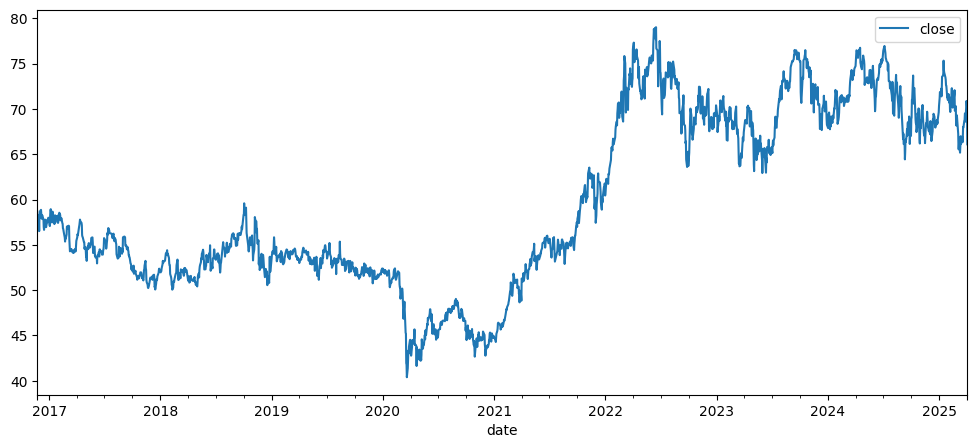

In [261]:
data.plot(figsize=(12,5));

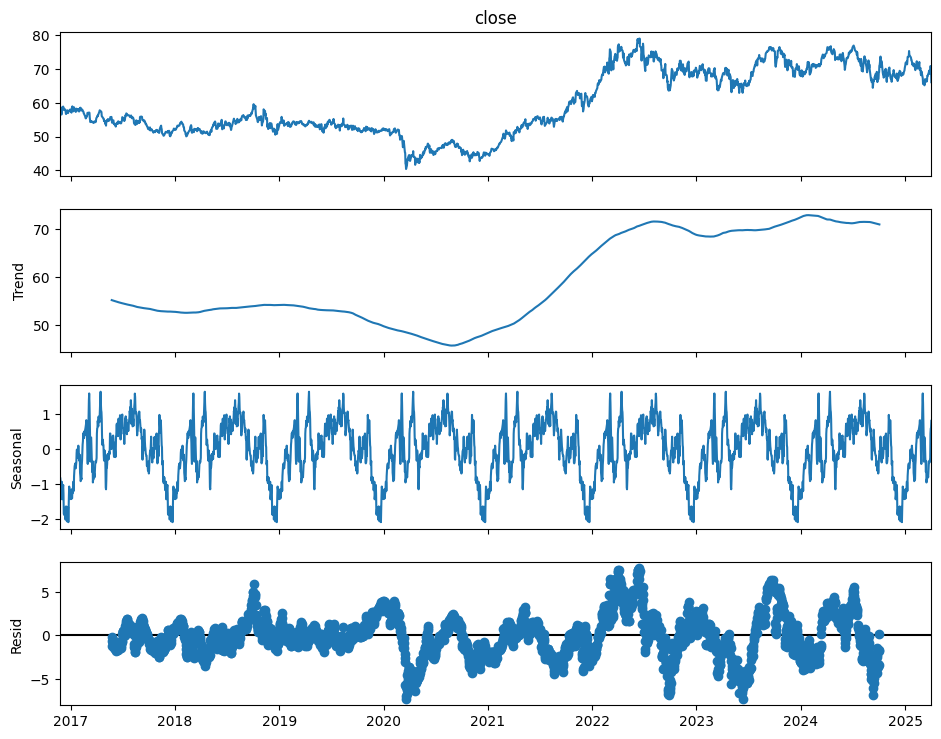

In [218]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['close'], model='additive', period=365)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

In [219]:
# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80/20)
# train_size = int(len(data) * 0.8)
# train_data = data.iloc[:train_size]
# test_data = data.iloc[train_size:]

# print(f"Kích thước tập huấn luyện: {len(train_data)} mẫu")
# print(f"Kích thước tập kiểm tra: {len(test_data)} mẫu")

In [220]:
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np

# # Chuẩn hóa dữ liệu trong cột 'close' bằng MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(train_data)

In [221]:
# scaled_train = scaler.transform(train_data)
# scaled_test = scaler.transform(test_data)

In [262]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Chuẩn hóa dữ liệu trong cột 'close' bằng MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Chia dữ liệu đã chuẩn hóa thành tập huấn luyện và tập kiểm tra (80/20)

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_size,:]
test_data = scaled_data[train_size:len(scaled_data),:]

print(f"Kích thước tập huấn luyện: {len(train_data)} mẫu")
print(f"Kích thước tập kiểm tra: {len(test_data)} mẫu")

Kích thước tập huấn luyện: 2443 mẫu
Kích thước tập kiểm tra: 611 mẫu


In [263]:
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Tạo các chuỗi thời gian phù hợp cho mô hình RNN
look_back = 10 # sử dụng 10 ngày trước để dự đoán ngày tiếp theo
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước y_train: {y_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")
print(f"Kích thước y_test: {y_test.shape}")

Kích thước X_train: (2433, 10)
Kích thước y_train: (2433,)
Kích thước X_test: (601, 10)
Kích thước y_test: (601,)


## Time Series Generator

In [224]:
# from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [225]:
# scaled_train

In [226]:
# n_input = 7   # 2 đầu vào input để dự đoán (vd: ngày 1 + ngày 2 => ngày 3)
# n_features = 1    # số cột
# generator = TimeseriesGenerator(scaled_train, scaled_train,length=n_input, batch_size=1)  # batch_size=1: cụm 3 dòng đầu (với n_input=2)

In [227]:
# X, y = generator[0]

In [228]:
# print(f'Given the Array: \n {X.flatten()}')
# print(f'Predict this y: \n {y}')

**Reasoning**:
The next step is to create a function that transforms the time series data into input sequences (X) and corresponding output labels (y) suitable for an RNN model. This function will then be applied to the training and testing datasets.



In [229]:
# def create_dataset(dataset, look_back=1):
#     X, y = [], []
#     for i in range(len(dataset) - look_back):
#         a = dataset[i:(i + look_back), 0]
#         X.append(a)
#         y.append(dataset[i + look_back, 0])
#     return np.array(X), np.array(y)

# # Tạo các chuỗi thời gian phù hợp cho mô hình RNN
# look_back = 7 # sử dụng 7 ngày trước để dự đoán ngày tiếp theo
# X_train, y_train = create_dataset(train_data, look_back)
# X_test, y_test = create_dataset(test_data, look_back)

# print(f"Kích thước X_train: {X_train.shape}")
# print(f"Kích thước y_train: {y_train.shape}")
# print(f"Kích thước X_test: {X_test.shape}")
# print(f"Kích thước y_test: {y_test.shape}")

## Xây dựng mô hình RNN

### Subtask:
Định nghĩa và xây dựng kiến trúc mô hình Mạng nơ-ron hồi quy (RNN), ví dụ như LSTM hoặc GRU, phù hợp với dữ liệu chuỗi thời gian.


In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
print("Keras models and layers imported.")

Keras models and layers imported.


**Reasoning**:
Reshape the input data for the RNN model, define a Sequential model, add an LSTM layer, a Dense output layer, compile the model, and print its summary to complete the RNN model construction.



In [264]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(f"Kích thước X_train sau khi reshape: {X_train.shape}")
print(f"Kích thước X_test sau khi reshape: {X_test.shape}")

model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(look_back, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

print("Mô hình RNN đã được xây dựng và biên dịch.")
model.summary()

Kích thước X_train sau khi reshape: (2433, 10, 1)
Kích thước X_test sau khi reshape: (601, 10, 1)
Mô hình RNN đã được xây dựng và biên dịch.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [232]:
# model = Sequential()
# model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='mse')

In [233]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code block successfully built and compiled the RNN model. The next logical step, as per the overall task, is to train the defined RNN model using the prepared training data. This involves fitting the model to `X_train` and `y_train` for a specified number of epochs.



In [265]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
77/77 - 2s - 29ms/step - loss: 0.0228
Epoch 2/100
77/77 - 1s - 8ms/step - loss: 8.2579e-04
Epoch 3/100
77/77 - 1s - 8ms/step - loss: 7.5658e-04
Epoch 4/100
77/77 - 1s - 8ms/step - loss: 7.8725e-04
Epoch 5/100
77/77 - 0s - 5ms/step - loss: 7.2278e-04
Epoch 6/100
77/77 - 0s - 5ms/step - loss: 7.0614e-04
Epoch 7/100
77/77 - 0s - 5ms/step - loss: 7.3125e-04
Epoch 8/100
77/77 - 0s - 5ms/step - loss: 6.7351e-04
Epoch 9/100
77/77 - 0s - 5ms/step - loss: 6.6228e-04
Epoch 10/100
77/77 - 1s - 8ms/step - loss: 6.6500e-04
Epoch 11/100
77/77 - 0s - 5ms/step - loss: 6.7069e-04
Epoch 12/100
77/77 - 1s - 8ms/step - loss: 6.5761e-04
Epoch 13/100
77/77 - 0s - 5ms/step - loss: 6.3352e-04
Epoch 14/100
77/77 - 1s - 9ms/step - loss: 6.1164e-04
Epoch 15/100
77/77 - 1s - 8ms/step - loss: 6.1402e-04
Epoch 16/100
77/77 - 1s - 8ms/step - loss: 6.0034e-04
Epoch 17/100
77/77 - 1s - 8ms/step - loss: 6.0990e-04
Epoch 18/100
77/77 - 1s - 7ms/step - loss: 5.6194e-04
Epoch 19/100
77/77 - 0s - 6ms/step - los

In [235]:
# model.fit(generator, epochs=100)

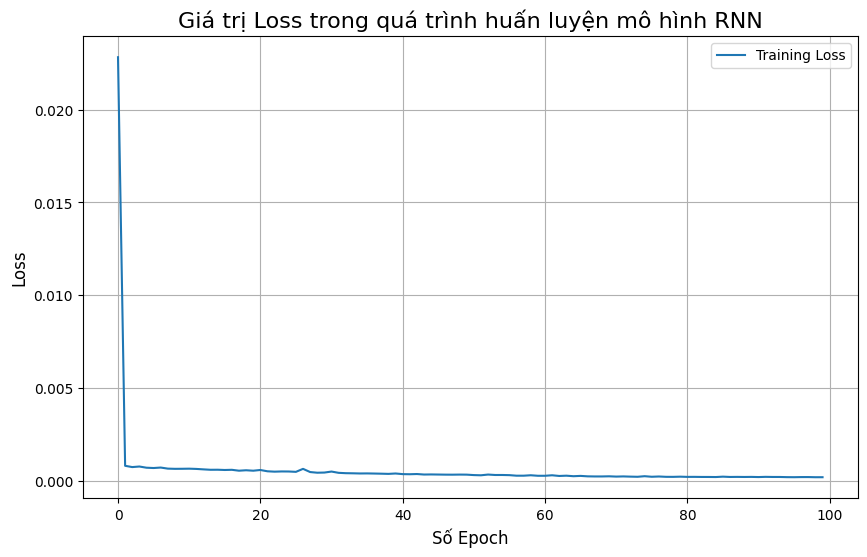

In [274]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Giá trị Loss trong quá trình huấn luyện mô hình RNN', fontsize=16)
plt.xlabel('Số Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

In [237]:
# model.history.history.keys()

In [238]:
# loss_per_epoch = model.history.history['loss']
# plt.plot(range(len(loss_per_epoch)), loss_per_epoch);

## Dự đoán và Đánh giá

### Subtask:
Sử dụng mô hình đã huấn luyện để dự đoán trên tập kiểm tra và tính toán các chỉ số đánh giá như MSE, RMSE, MAE để đo lường hiệu suất.


**Reasoning**:
First, the trained model needs to make predictions on the test set. Then, these predictions and the actual test values must be inverse-transformed to their original scale for meaningful evaluation. Finally, performance metrics like MSE, RMSE, and MAE will be calculated and displayed to assess the model's accuracy.



In [239]:
# first_eval_batch = scaled_test[-7:]

In [240]:
# first_eval_batch

In [241]:
# first_eval_batch =first_eval_batch.reshape((1, n_input, n_features))

In [242]:
# model.predict(first_eval_batch)

In [243]:
# scaled_test[0]

In [267]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Sử dụng mô hình đã huấn luyện để tạo ra các dự đoán trên tập X_test
y_pred = model.predict(X_test)
print("Dự đoán trên tập kiểm tra đã được tạo.")

# 2. Đảo ngược quá trình chuẩn hóa cho cả y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
print("Dữ liệu dự đoán và thực tế đã được đảo ngược chuẩn hóa.")

# 3. Tính toán các chỉ số đánh giá hiệu suất của mô hình
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)

# 4. In ra các giá trị MSE, RMSE và MAE đã tính toán
print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Dự đoán trên tập kiểm tra đã được tạo.
Dữ liệu dự đoán và thực tế đã được đảo ngược chuẩn hóa.

Mean Squared Error (MSE): 0.4733
Root Mean Squared Error (RMSE): 0.6879
Mean Absolute Error (MAE): 0.4773


In [268]:
len(y_test_original)

601

In [269]:
len(y_pred_original)

601

In [270]:
test = data.iloc[-601:]

test

,close
date,
2023-08-12,73.310000
2023-08-13,73.230000
2023-08-14,73.150000
2023-08-15,72.400000
2023-08-16,72.240000
...,...
2025-03-30,70.113333
2025-03-31,70.870000
2025-04-01,70.690000


In [271]:
test['pred'] = y_pred_original
test

,close,pred
date,,
2023-08-12,73.310000,73.290443
2023-08-13,73.230000,73.287994
2023-08-14,73.150000,73.249115
2023-08-15,72.400000,73.181938
2023-08-16,72.240000,72.388596
...,...,...
2025-03-30,70.113333,69.306961
2025-03-31,70.870000,70.195984
2025-04-01,70.690000,70.964806


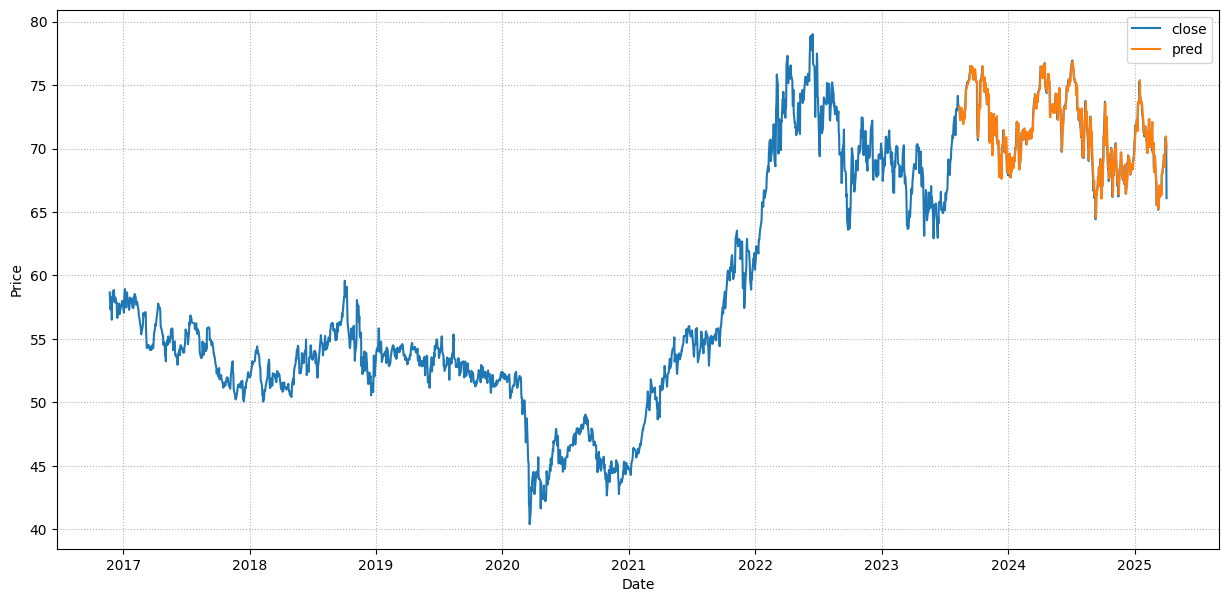

In [275]:
plt.figure(figsize=(15, 7))

plt.plot(data.index, data, label='close')
plt.plot(test.index, test['pred'], label='pred')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(ls=":")

plt.show()

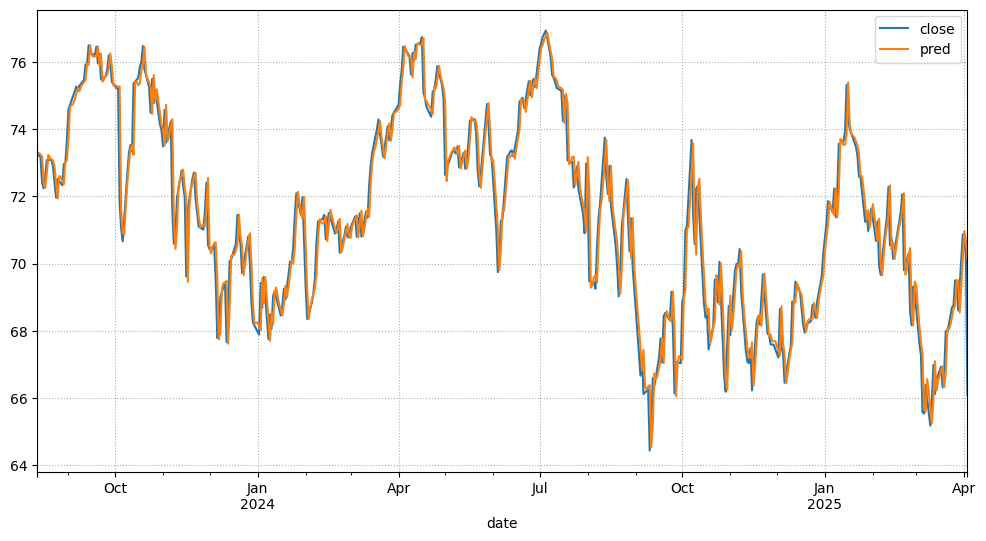

In [273]:
test.plot(figsize=(12,6))
plt.grid(ls=':')
plt.show()

In [ ]:
# test_predictions= scaled_train[-n_input:]
# current_batch= first_eval_batch.reshape(1, n_input, n_features)

In [ ]:
# current_batch

In [ ]:
# test_predictions= []
# first_eval_batch= scaled_train[-n_input:]
# current_batch= first_eval_batch.reshape(1, n_input, n_features)

# for i in range(len(test_data)):
#     current_pred= model.predict(current_batch, verbose=0)[0]

#     test_predictions.append(current_pred)
#     current_batch= np.append(current_batch[:,1:,:], [[current_pred]], axis= 1)

In [ ]:
# test_predictions

## Inverse Transformmations and Compare

In [ ]:
# true_prediction = scaler.inverse_transform(test_predictions)

In [ ]:
# true_prediction

In [ ]:
# test_data['pred'] = true_prediction

In [ ]:
# test_data

In [ ]:
# test_data.plot(figsize=(12,7));